In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#function defining
def createRealWavelet (time,freq,fwhm): # fwhm = full width and half maximum
  sinepart = np.cos(2*np.pi*freq*time)
  gauspart = np.exp((-4*np.log(2)*time**2)/(fwhm**2))
  return sinepart*gauspart

def createComplexWavelet (time,freq,fwhm): # fwhm = full width and half maximum
  sinepart = np.exp(1j*2*np.pi*freq*time)
  gauspart = np.exp((-4*np.log(2)*time**2)/(fwhm**2))
  return sinepart*gauspart


In [ ]:
# parameters
freq = 5
fwhm = 0.5
srate = 500
time = np.arange(-2*srate,2*srate+1/srate)/srate
npnts = len(time)

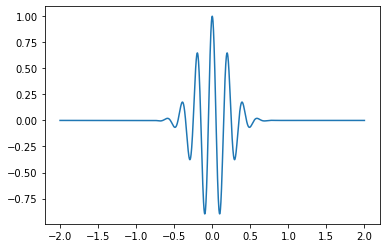

In [ ]:
from numpy.core.numeric import correlate
#Creating our wavelet
wavelet = createRealWavelet(time,freq,fwhm)
plt.plot(time,wavelet);

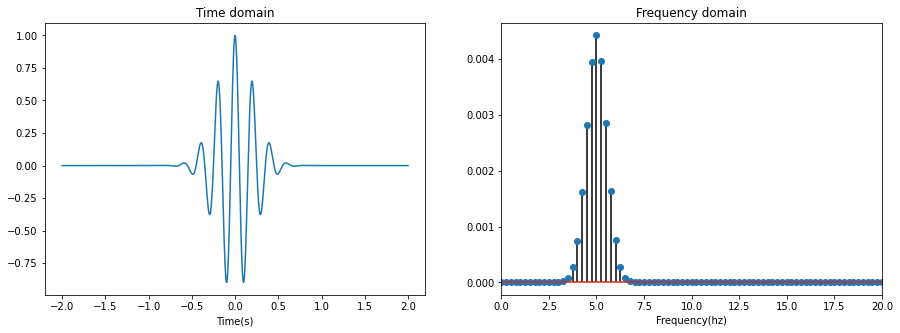

In [ ]:
# get the power spectrum of the wavelet
waveletX = np.abs(np.fft.fft(wavelet/npnts))**2
hz = np.linspace(0,srate/2,int(npnts/2+1))


#create a figure with 1x2 subplot geometry

fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(time,wavelet)
ax[0].set_xlabel('Time(s)')
ax[0].set_title('Time domain')

ax[1].stem(hz,waveletX[:len(hz)],'k',use_line_collection = True)
ax[1].set_xlabel('Frequency(hz)')
ax[1].set_xlim([0,20])
ax[1].set_title('Frequency domain')

plt.show()

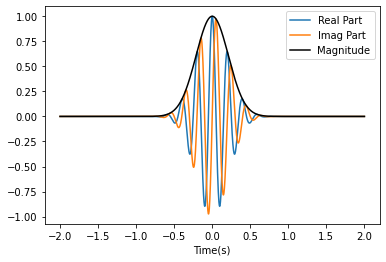

In [ ]:
wavelet = createComplexWavelet(time,freq,fwhm)

plt.plot(time,np.real(wavelet),label='Real Part')
plt.plot(time,np.imag(wavelet),label='Imag Part')
plt.plot(time,np.abs(wavelet),'k',label='Magnitude')
plt.legend()
plt.xlabel('Time(s)')
plt.show()


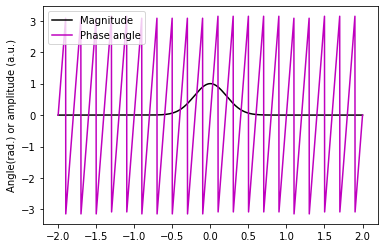

In [ ]:
plt.plot(time,np.abs(wavelet),'k',label='Magnitude')
plt.plot(time,np.angle(wavelet),'m',label='Phase angle')
plt.legend()
plt.ylabel('Angle(rad.) or amplitude (a.u.)')
plt.show()

In [ ]:
#define parameters
low_frequency = 2
high_frequency = 80
num_of_freq = 42

frex = np.linspace(low_frequency,high_frequency,num_of_freq)
fwhms = np.linspace(3,1,num_of_freq)

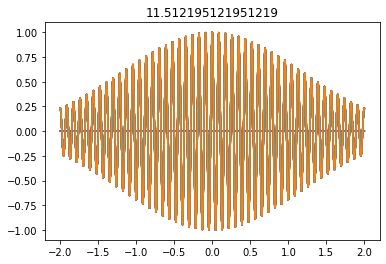

In [ ]:
# initialize te wavelet matrix

waveletfamily = np.zeros((num_of_freq,npnts),dtype=complex)

for wi in range(num_of_freq):
  waveletfamily[wi,:] = createComplexWavelet(time,frex[wi],fwhms[wi])

  plt.plot(time,np.real(waveletfamily[5,:]))
  #plt.plot(time,np.abs(waveletfamily[5,:]))  #for only magnitude find
  plt.title(str(frex[5]))

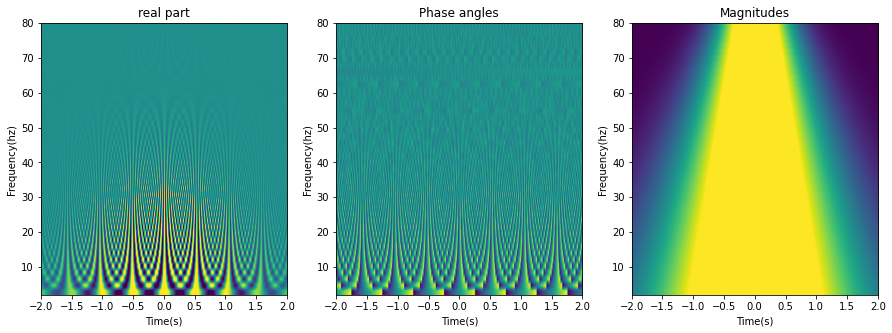

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

#show the real part of the wavelet family

ax[0].imshow(np.real(waveletfamily),aspect='auto',origin='lower',
             extent=[time[0],time[-1],low_frequency,high_frequency],
             vmin=-0.7,vmax=0.7)

ax[0].set_xlabel('Time(s)')
ax[0].set_ylabel('Frequency(hz)')
ax[0].set_title('real part')

#show the phase angles of the wavelet family

ax[1].imshow(np.angle(waveletfamily),aspect='auto',origin='lower',
             extent=[time[0],time[-1],low_frequency,high_frequency],
             vmin=-3,vmax=3)

ax[1].set_xlabel('Time(s)')
ax[1].set_ylabel('Frequency(hz)')
ax[1].set_title('Phase angles')


#show the magnitude of the wavelet family

ax[2].imshow(np.abs(waveletfamily),aspect='auto',origin='lower',
             extent=[time[0],time[-1],low_frequency,high_frequency],
             vmin=0,vmax=0.7)

ax[2].set_xlabel('Time(s)')
ax[2].set_ylabel('Frequency(hz)')
ax[2].set_title('Magnitudes')

plt.show()

In [ ]:
from google.colab import files
upload = files.upload()

Saving sampleEEGdata.mat to sampleEEGdata.mat


In [ ]:
# import the data to python
from scipy.io import loadmat
EEG = loadmat('sampleEEGdata.mat')

#extract the necessary information

times =np.squeeze(EEG['EEG'][0][0][14])
data = EEG['EEG'][0][0][15]
fs = EEG['EEG'][0][0][11][0][0].astype(int) #sampling rate

print(fs)
print(np.shape(times))
print(np.shape(data))

256
(640,)
(64, 640, 99)


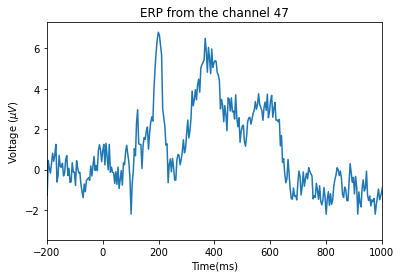

In [ ]:
#create the event related potential (ERP)

erp = np.mean(data[46,:,:],axis = 1)
plt.plot(times,erp)
plt.xlim([-200,1000])
plt.xlabel('Time(ms)')
plt.ylabel('Voltage ($\mu V$)')
plt.title('ERP from the channel 47')
plt.show()

In [ ]:
#define parameters
low_frequency = 2
high_frequency = 30
num_of_freq = 42
time = np.arange(-fs,fs+1)/fs
#print(time[[0,-1]])

frex = np.linspace(low_frequency,high_frequency,num_of_freq)
fwhms = np.linspace(1,0.5,num_of_freq)

# initialize te wavelet matrix

waveletfamily = np.zeros((num_of_freq,len(time)),dtype=complex)
for wi in range(num_of_freq):
  waveletfamily[wi,:] = createComplexWavelet(time,frex[wi],fwhms[wi])

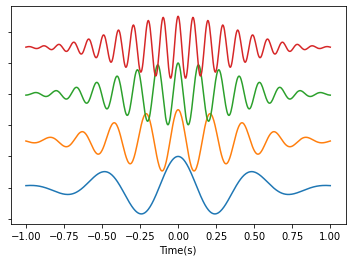

In [ ]:
#plot some selected wavelets
for i in range(4):

  plt.plot(time,np.real(waveletfamily[i*4,:])+i*1.5)

plt.xlabel('Time(s)')
plt.tick_params(labelleft=False)
plt.show()
  #plt.plot(time,1+np.real(waveletfamily[8,:]))

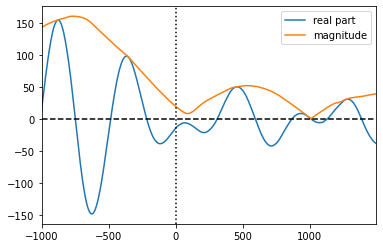

In [ ]:
#convolution !!!

convres = np.convolve(erp,waveletfamily[0,:],mode ='same')
plt.plot(times,np.real(convres),label = 'real part')
plt.plot(times,np.abs(convres),label = 'magnitude')
plt.plot([times[0],times[-1]],[0,0],'k--')

ylim = plt.ylim()
plt.plot([0,0],ylim,'k:')

plt.xlim([times[0],times[-1]])
plt.ylim(ylim)
plt.legend()
plt.show()

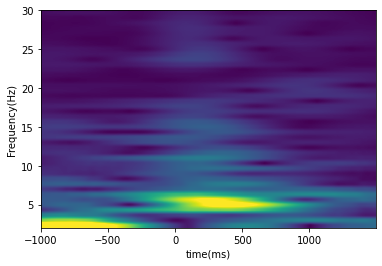

In [ ]:
#initialize a matrix

tf = np.zeros((num_of_freq,len(times)))

# loop over frequencies to implement convolution

for wi in range(num_of_freq):
  convres  = np.convolve(erp,waveletfamily[wi,:],mode = 'same')
  tf[wi,:] = np.abs(convres)
# create the image

plt.imshow(tf,origin='lower',
           aspect = 'auto',vmax = np.max(tf)*.7,
           extent = [times[0],times[-1],low_frequency,high_frequency])
plt.xlabel('time(ms)')
plt.ylabel('Frequency(Hz)')
plt.show()

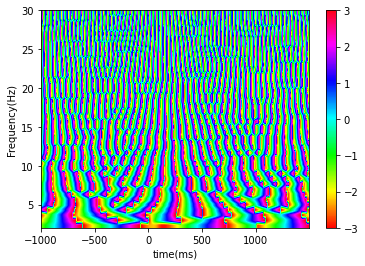

In [ ]:
#initialize a matrix

phases = np.zeros((num_of_freq,len(times)))

# loop over frequencies to implement convolution

for wi in range(num_of_freq):
  convres  = np.convolve(erp,waveletfamily[wi,:],mode = 'same')
  phases[wi,:] = np.angle(convres)
# create the image

plt.imshow(phases,origin='lower',
           aspect = 'auto',vmax =3,vmin = -3,
           extent = [times[0],times[-1],low_frequency,high_frequency],
           cmap = 'hsv')
plt.xlabel('time(ms)')
plt.colorbar()
plt.ylabel('Frequency(Hz)')
plt.show()

In [ ]:
# all these steps are intermediate steps
# I have used here real and complex valued mortlet convolution
# A long way to go for completion !!!